# Contrôle pratique sur NumPy, Pandas et Matplotlib

In [190]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

### Partie 1: NumPy

1. Créez un tableau NumPy contenant les nombres de 1 à 10.

In [191]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

2. Calculez la somme, la moyenne et la médiane des éléments du tableau de l'exercice précédent.

In [192]:
somme = np.sum(a)
print(somme)
moyenne = np.mean(a)
print(moyenne)
mediane = np.median(a) ###############################
print(mediane)


55
5.5
5.5


3. Écrivez une fonction pour inverser un tableau NumPy donné. Vérifiez que l'inversion fonctionne correctement.

In [193]:
def inversion(tab):
    return np.flip(tab)

inversion(a)

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

4. Créez un tableau 2D de taille 5x5 où chaque élément est le résultat de la multiplication des indices de ligne et de colonne. Affichez le tableau.

In [194]:
b = [
    [0, 0, 0, 0, 0],
    [0, 1, 2, 3, 4],
    [0, 2, 4, 6, 8],
    [0, 3, 6, 9, 12],
    [0, 4, 8, 12, 16]]
b

[[0, 0, 0, 0, 0],
 [0, 1, 2, 3, 4],
 [0, 2, 4, 6, 8],
 [0, 3, 6, 9, 12],
 [0, 4, 8, 12, 16]]

5. Implémentez une fonction qui calcule la multiplication matricielle de deux matrices NumPy sans utiliser la fonction `np.dot`, donc vous devez coder le produit de deux matrices vous-mêmes. Vérifiez que la multiplication fonctionne avec succès pour deux matrices compatibles.

In [195]:
def multi_matriciel(tab1, tab2):
    large = min(len(tab1), len(tab2))
    long = min(len(tab1[0]), len(tab2[0]))
    tab = [[0 for i in range(long)] for i in range(large)]
    for i in range(large):
        for j in range(long):
            try:
                x = tab2[i][j]
            except:
                x = 1
            try:
                y = tab1[i][j]
            except:
                y = 1
            tab[i][j] = x * y        
    return tab
    

Y = np.array([[2, 1], [1, 2]])
X = np.array([[1, 0], [0, 1]])

A = np.array([[0, 1, 1], [1, 0, 1]])
B = np.array([[1, 1], [1, 1], [-1, 1]])

print(multi_matriciel(X, Y)) # [[2, 0], [0, 2]]
print(multi_matriciel(A, B)) # [[0, 2],[0, 2]]

[[2, 0], [0, 2]]
[[0, 1], [1, 0]]


## Partie 2: Pandas 

Le fichier 'titanic.csv' est un jeu de données classique dans le domaine de l'apprentissage automatique et de l'analyse de données. Il contient des informations sur les passagers à bord du célèbre navire Titanic, y compris des détails tels que leur âge, leur sexe, leur classe de billet, leur statut de survie, etc. Voici une explication des principales colonnes que l'on trouve dans ce jeu de données :

1. **PassengerId**: Un identifiant unique attribué à chaque passager.
2. **Survived**: Indique si le passager a survécu ou non. 1 signifie "survécu" et 0 signifie "décédé".
3. **Pclass**: La classe de billet du passager. Il y a trois classes : 1ère classe, 2ème classe et 3ème classe.
4. **Name**: Le nom du passager.
5. **Sex**: Le sexe du passager, soit 'male' pour masculin, soit 'female' pour féminin.
6. **Age**: L'âge du passager en années.
7. **SibSp**: Le nombre de frères et sœurs (ou conjoints) à bord du Titanic.
8. **Parch**: Le nombre de parents/enfants à bord du Titanic.
9. **Ticket**: Le numéro de billet du passager.
10. **Fare**: Le tarif payé par le passager pour le voyage.
11. **Cabin**: Le numéro de cabine du passager, s'il est connu.
12. **Embarked**: Le port d'embarquement du passager. C'est une abréviation de trois ports possibles : 'C' pour Cherbourg, 'Q' pour Queenstown, 'S' pour Southampton.

In [196]:
# Chargement du jeu de données
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head(2)

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,C22 C26,S


1. Calculez le nombre total de passagers dans le dataset et le nombre de passagers survivants. Ensuite, déterminez le taux de survie global (en pourcentage).

In [197]:
nbr_total = titanic_df.shape[0]
surviv = titanic_df[titanic_df['survived'] == 1]
survivant = surviv.shape[0]
print(nbr_total)
print(survivant)
print("Il y a eu un taut de survi de "+ str(survivant * 100 / nbr_total) + " %")

1309
500
Il y a eu un taut de survi de 38.19709702062643 %


2. Calculez la proportion de passagers survivants par classe (pclass) et affichez les résultats.

In [198]:
surviv_pclass = titanic_df.groupby('pclass')['survived'].sum()
print(surviv_pclass)
print("Il y a eu un taut de survi de "+ str(200 * 100 / 500) + " % pour la classe 1")
print("Il y a eu un taut de survi de "+ str(119 * 100 / 500) + " % pour la classe 2")
print("Il y a eu un taut de survi de "+ str(181 * 100 / 500) + " % pour la classe 3")

pclass
1    200
2    119
3    181
Name: survived, dtype: int64
Il y a eu un taut de survi de 40.0 % pour la classe 1
Il y a eu un taut de survi de 23.8 % pour la classe 2
Il y a eu un taut de survi de 36.2 % pour la classe 3


3. Calculez la moyenne, la médiane, l'écart type des tarifs des billets ('fare') payés par les passagers. Ensuite, identifiez le passager ayant payé le tarif le plus élevé.

In [199]:
moyenne = np.mean(titanic_df['fare'])
print(moyenne)
ecart = np.std(titanic_df['fare'])
print(ecart)
mediane = np.median(titanic_df['fare'])
print(mediane)

33.281085637891515
51.721732240627894
14.4542


4. Créez une nouvelle colonne 'Famille' dans le DataFrame qui représente la taille de la famille de chaque passager (somme des colonnes 'sibsp' et 'parch'). Ensuite, créez une nouvelle colonne 'EstEnfant' qui indique si le passager est un enfant (âge < 18) ou non.

In [200]:
titanic_df['Famille'] = titanic_df['sibsp'] + titanic_df['parch']

bins = [0, 18, np.inf]
labels = [True, False]
titanic_df['EstEnfant'] = pd.cut(titanic_df['age'], bins=bins, labels=labels)

print(titanic_df.head(10))


   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
5       1         1                              Anderson, Mr. Harry    male   
6       1         1                Andrews, Miss. Kornelia Theodosia  female   
7       1         0                           Andrews, Mr. Thomas Jr    male   
8       1         1    Appleton, Mrs. Edward Dale (Charlotte Lamson)  female   
9       1         0                          Artagaveytia, Mr. Ramon    male   

       age  sibsp  parch      fare    cabin embarked  Famille EstEnfant  
0  29.0000      0      0  211.3375       B5  

5. Identifiez le nom le plus fréquent parmi les passagers et affichez-le.

In [201]:
# truc = titanic_df.groupby(titanic_df['name'].split()[0]) 
print(titanic_df['name'][0].split(','))
# titanic_df['Nom'] = np.where(titanic_df['name'].split()[0] > moyenne_age, titanic_df['Nom'].str.upper(), titanic_df['Nom'])
titanic_df['Nom'] = [titanic_df['name'][i].split()[0] for i in range(titanic_df.shape[0])]
truc = titanic_df.groupby('Nom')

['Allen', ' Miss. Elisabeth Walton']


## Partie 3: Matplotlib

1. Utilisez Matplotlib pour tracer un graphique à barres empilées montrant le nombre de passagers survivants et décédés par classe. Ajoutez des étiquettes appropriées pour les axes et un titre au graphique.

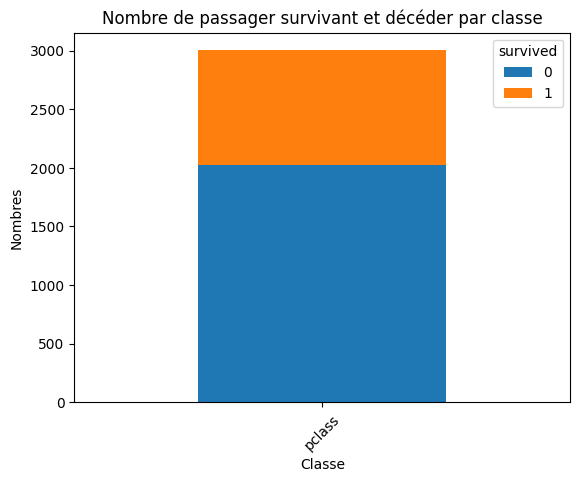

In [212]:
pivot_table = titanic_df.pivot_table(columns='survived', values= 'pclass', aggfunc='sum')
pivot_table.plot(kind='bar', stacked=True)

plt.title('Nombre de passager survivant et décéder par classe')
plt.xlabel('Classe')
plt.ylabel('Nombres')
plt.legend(title='survived')
plt.xticks(rotation=45)
plt.show()

2. Tracez un histogramme montrant la distribution des âges des passagers du Titanic. Choisissez un nombre approprié de compartiments pour mieux visualiser la répartition des âges.

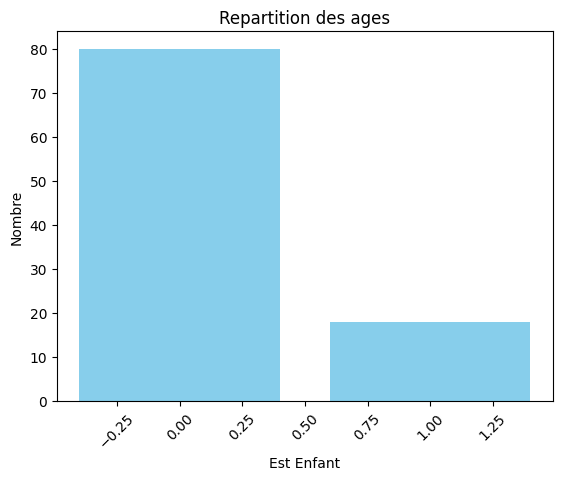

In [ ]:


plt.bar(titanic_df['EstEnfant'], titanic_df['age'], color='skyblue')
plt.title('Repartition des ages')
plt.xlabel('Est Enfant')
plt.ylabel('Nombre')
plt.xticks(rotation=45)
plt.show()

3. Tracez un nuage de points (scatter plot) représentant l'âge des passagers en fonction du prix du billet ('Fare'). Coloriez les points en fonction du sexe du passager.

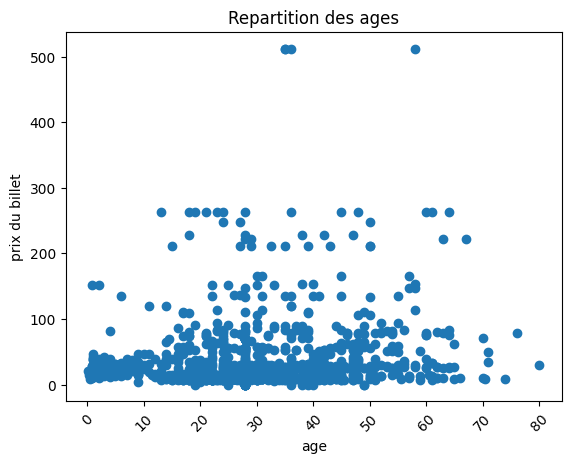

In [ ]:
# plt.scatter(x=titanic_df['age'], y=titanic_df['fare'], s=titanic_df['sex'], c=['blue', 'red'])
plt.scatter(x=titanic_df['age'], y=titanic_df['fare'],)
plt.title('Repartition des ages')
plt.xlabel('age')
plt.ylabel('prix du billet')
plt.xticks(rotation=45)
plt.show()